# Introduction

## Graph Basics

Given the following undirected graph $G=(V,E)$:

$V=\{A,B,C,D,E\}$

$E=\{\{A,B\},\{A,C\},\{B,C\},\{C,D\},\{D,E\}\}$

1. Draw the graph.
2. Write down the adjaceny matrix $A$.
3. Compute the degree of each node and the average node degree.
4. Is the graph connected? If not, how many connected components are there? (Hint: An undirected graph is connected if there is a path between every pair of nodes.)

## Directed vs Undirected

For the same set of nodes and edges as above, assume now that all edges are directed from the alphabetically smaller node to the larger one (e.g., $A \to B$, $B \to C$).

1. Write the adjacency matrix for this directed version.
1. Compute in-degrees and out-degrees of each node.
1. Identify nodes with zero in-degree or zero out-degree.

## Large Graphs

You are given an undirected graph with 1 million nodes.

1. What is the lower and upper bounds of the cardinality of $E$? (Hint: Cardinality is the number of elements in a set.)
1. If the graph had 5 million edges, what would be the density of the graph? (The graph density is defined to be the ratio of the number of edges with respect to the maximum possible edges.)
1. With 1 million nodes and 5 million edges, which representation (adjacency list vs. adjacency matrix) would be more memory-efficient and why? (Hint: Adjacency list is a graph representation where each node stores a list of its neighboring nodes (i.e., nodes directly connected by an edge))
1. Discuss which one is more convenient for performing:
    - Degree computations
    - Edge lookups
    - Neighborhood sampling (i.e., randomly selecting a subset of a node’s neighbors).


## Heterogeneous Graphs

You are given a heterogeneous graph describing a small academic network:

- Nodes: `{paper, author, institution}`
- Edges:
    - `author -> paper` ("writes")
    - `paper -> paper` ("cites")
    - `author -> institution` ("affiliated_with")

1. Explain why using a simple adjacency matrix is not sufficient to represent this graph, and how would you represent it?
1. What would be the maximum number of edges this graph may have with $v_p$ paper, $v_a$ author and $v_i$ institution nodes?
1. Assume that all possible edges exist in this graph. For $v_p=100$, $v_a=20$ and $v_i=2$, what would be the density? (Hint: For the denominator, think of the case where there is no constraints on edges.)
1. Give one example of:
    - A node-level task
    - An edge-level task
    - A graph-level task
1. You are tasked to add auxiliary (implicit) edges between author nodes in this graph, what edge types would you add? How would you determine which author nodes to connect?

## Local Structure

Consider the following graphs $G1$ and $G2$:

![G1](assets/w1_g1.png){width=100px}

![G2](assets/w1_g2.png){width=100px}

1. Compute the degree of each node and the average degree in both graphs.
2. For each node, list the degrees of its neighbors (this represents a 1-hop "neighborhood description").
3. Based only on this information (degrees and neighbor degrees), could a simple model that only "looks one hop around each node" tell $G1$ and $G2$ apart?
4. How might a model do better?

## Deep Learning with Graphs

Answer briefly:

1. Why can’t we directly apply CNNs to graphs like we do for images?
1. What property must the model have to generalize across graphs of different sizes?
1. Why is this property natural for graphs but not for images?

## Programming: NetworkX and PyG Basics

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
For more info, check out its [documentation](https://networkx.org/documentation/stable/).

PyG (PyTorch Geometric) is a library built upon PyTorch to easily write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data. Check out the documentation [here](https://pytorch-geometric.readthedocs.io/en/latest/).

### Building a Simple Graph

Complete the following code snippet to build the graph given in the first exercise.

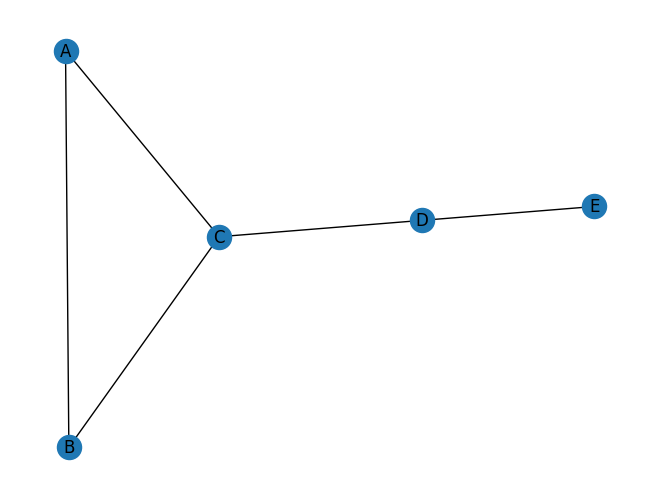

In [1]:
import networkx as nx

# create an empty graph
G=nx.Graph()

############# Your code here ############

# add nodes 
G.add_nodes_from(["A","B","C","D","E"]) 

# add edges 
G.add_edge("A","B") 
G.add_edge("A","C") 
G.add_edge("B","C") 
G.add_edge("C","D") 
G.add_edge("D","E")

#########################################

# draw the graph
nx.draw(G, with_labels=True)

### Zachary's karate club network

Now let's consider a more interesting graph: The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

The following code snippet loads and draws the graph. Also notice that the `average_degree` function is left for you to implement.

Average degree of karate club network is 4.588235294117647


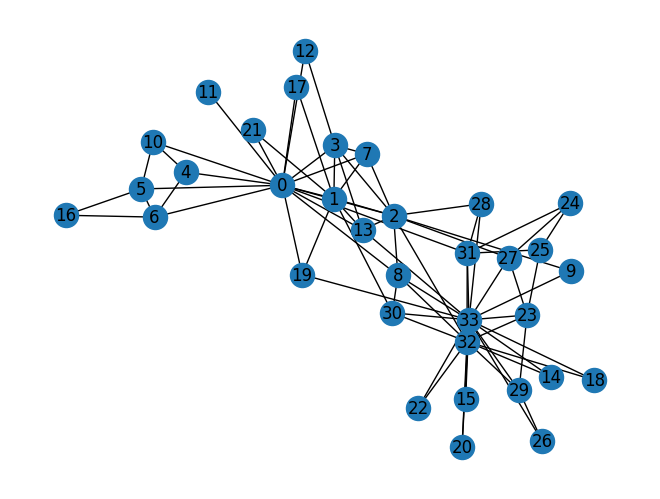

In [5]:
G = nx.karate_club_graph()

# Visualize the graph
nx.draw(G, with_labels = True)

def average_degree(num_edges, num_nodes):
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of
    # the graph.

    avg_degree = 0

    ############# Your code here ############

    # avg_degree = sum of all node degrees / number of nodes
    # each edge contributes to the degree of two nodes
    # thus, sum of all node degrees = 2 * number of edges

    avg_degree = (2 * num_edges) / num_nodes

    #########################################

    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

### NetworkX Graph to PyTorch Tensor

Now let's transform the graph $G$ into a PyTorch tensor. First, let's check if PyTorch is properly installed.

In [6]:
import torch
print(torch.__version__)

2.9.0+cpu


We can generate PyTorch tensor with all zeros, ones or random values.

In [7]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.8581, 0.9668, 0.1101, 0.8303],
        [0.0017, 0.9044, 0.7738, 0.3135],
        [0.6353, 0.0318, 0.3425, 0.6237]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [16]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros)
print(zeros.dtype)

print("-----------------------------")

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros)
print(zeros.dtype)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.float32
-----------------------------
tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])
torch.int64


In the next code snippet, complete the two functions to get the edge list of the karate club network and transform it into `torch.LongTensor`.
What is the `torch.sum` value of `pos_edge_index` tensor?

In [26]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected
    # by two nodes.

    edge_list = []

    ############# Your code here ############

    edge_list = list(G.edges())

    #########################################

    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2, len(edge_list)].

    edge_index = torch.tensor([])

    ############# Your code here ############

    # In PyTorch, .t() transposes the tensor — it swaps its rows and columns.
    # Why transpose?
    # Because PyTorch Geometric expects the edge index tensor in a specific format:
    # edge_index = [source_nodes
    #              target_nodes]

    edge_index = torch.tensor(edge_list, dtype=torch.long).t()

    #########################################

    return edge_index

pos_edge_list = graph_to_edge_list(G)
print("Edge list: {}".format(pos_edge_list))

pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("\nEdge index tensor (pos_edge_index):\n{}".format(pos_edge_index))

print("\nThe pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

Edge list: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]

Edge index tensor (pos_edge_index):
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18,

Question: What could be the benefit of the `Edge Index Tensor` representation over the adjacency list?

Answer:
An adjacency list may have an irregular structure, hence can’t be stored in a fixed-size tensor. Whereas edge index representation has the shape **[2, num_edges]**, which makes it more GPU- friendly.